In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
#import dataset
data=pd.read_csv("TravelInsurancePrediction.csv")

In [3]:
data.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [4]:
data.tail()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1
1986,1986,34,Private Sector/Self Employed,Yes,500000,4,0,No,No,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [6]:
data.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [7]:
#data reduced
#deleting unnecessary column, "Unnames: 0" column has no importance in prediction before that copying the data
df=data.copy()

In [8]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [9]:
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [10]:
#checking missing value
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [11]:
#checking duplicate value
df.duplicated().sum()

738

In [12]:
df[df.duplicated()]

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
69,31,Government Sector,No,300000,4,0,No,No,0
103,26,Private Sector/Self Employed,Yes,1400000,5,0,No,Yes,1
117,31,Government Sector,Yes,400000,5,0,No,No,0
148,25,Private Sector/Self Employed,Yes,1400000,4,0,No,Yes,1
164,28,Government Sector,Yes,300000,6,0,No,No,0
...,...,...,...,...,...,...,...,...,...
1978,34,Private Sector/Self Employed,Yes,700000,5,0,No,No,1
1979,28,Private Sector/Self Employed,Yes,1100000,4,1,No,No,0
1980,25,Private Sector/Self Employed,No,1150000,5,1,No,No,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
#univariate analysis

In [16]:
#checking categorical variable
data.describe(include="object")

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1987,1987,1987,1987
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1417,1692,1570,1607


In [17]:
for col in df.columns:
    print(col+":","\n")
  
    print(df[col].value_counts())
    print("------------------------------------------------------------------")

Age: 

28    283
34    158
31    148
29    125
33    108
26     91
27     91
25     87
32     67
30     47
35     44
Name: Age, dtype: int64
------------------------------------------------------------------
Employment Type: 

Private Sector/Self Employed    876
Government Sector               373
Name: Employment Type, dtype: int64
------------------------------------------------------------------
GraduateOrNot: 

Yes    1047
No      202
Name: GraduateOrNot, dtype: int64
------------------------------------------------------------------
AnnualIncome: 

500000     90
800000     86
1100000    74
1400000    73
600000     70
1300000    68
1200000    67
550000     58
900000     57
700000     56
1050000    54
750000     48
1250000    47
850000     46
1150000    43
1000000    36
1500000    36
350000     33
400000     31
300000     31
650000     29
1350000    26
1450000    19
950000     19
1700000    15
1750000    15
450000     12
1800000     4
1550000     4
1650000     2
Name: AnnualIncome, 

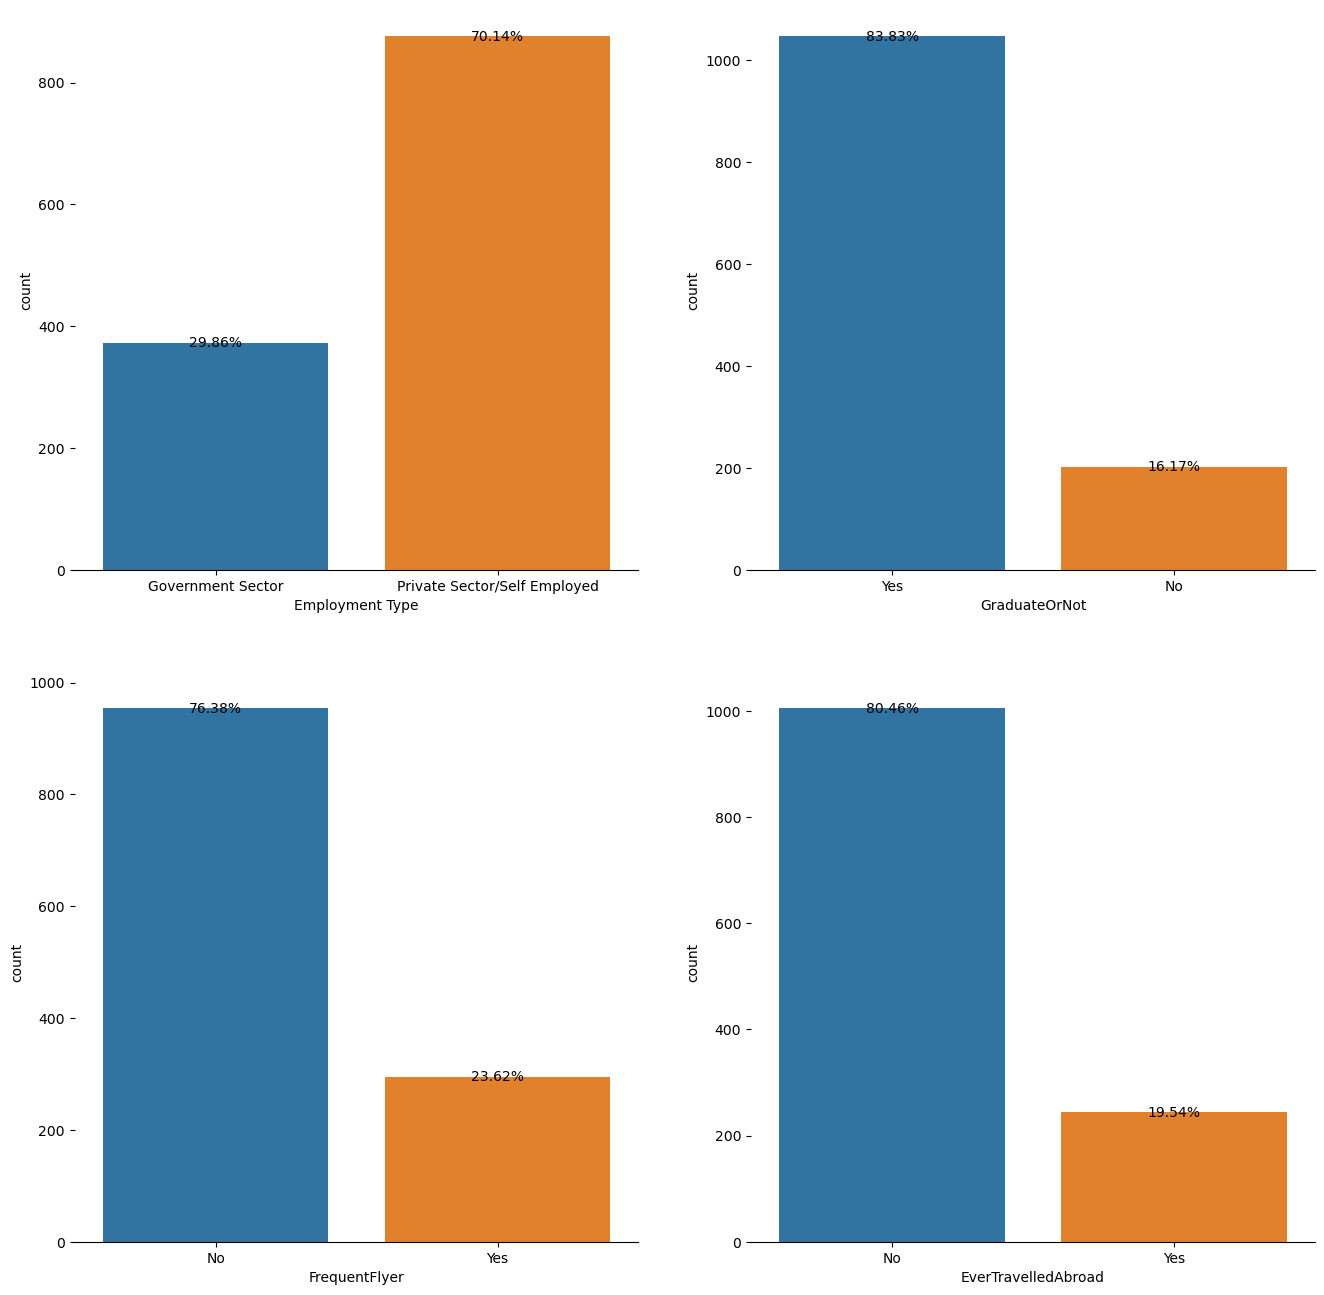

In [18]:
fig,ax=plt.subplots(2,2,figsize=(16,16))
index=0
ax=ax.flatten()
for col in df.columns:
    if df[col].dtypes=="object":
        fig=sns.countplot(df,x=col,ax=ax[index])
        index+=1
        for f in fig.patches:
            text=f"{(f.get_height()/len(df[col])*100).round(2)}%"
            fig.annotate(text,(f.get_x()+f.get_width()/2, f.get_height()),ha="center",va="center")
            sns.despine(top=True,left=True)
plt.show()
        


In [19]:
df["TravelInsurance"].value_counts().plot(kind="pie",autopct="%.2f%%", explode= (0.05, 0.05),figsize=(12,6),fontsize=14)
plt.legend(["0:Not Insurance","1:
            Insurence"])
plt.title("Travel Insurance")
plt.show()

SyntaxError: unterminated string literal (detected at line 2) (2276814126.py, line 2)

In [20]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1249.000000,1.249000e+03,1249.000000,1249.000000,1249.000000
mean,29.755805,9.345476e+05,4.890312,0.333066,0.386709
std,2.921039,3.607293e+05,1.762313,0.471499,0.487191
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.200000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


Mean of Age is :  30.0
Mode of Age is :  28
Median of Age is :  29.0


<function matplotlib.pyplot.show(close=None, block=None)>

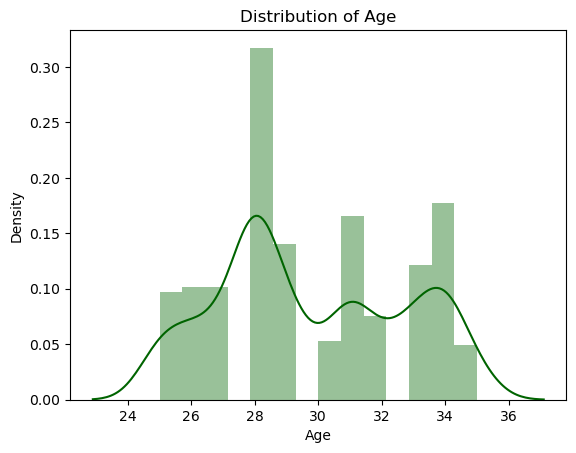

In [21]:
sns.distplot(df["Age"],kde=True,color="darkgreen")
plt.title("Distribution of Age")
print('Mean of Age is : ',df["Age"].mean().round(0))
print('Mode of Age is : ',df["Age"].mode()[0])
print('Median of Age is : ',df["Age"].median())
plt.show

Mean of AnnualIncome is :  934548.0
Mode of AnnualIncome is :  500000
Median of AnnualIncome is :  900000.0
Maximum value of AnnualIncome is :  1800000
Minimum value of AnnualIncome is :  300000


<function matplotlib.pyplot.show(close=None, block=None)>

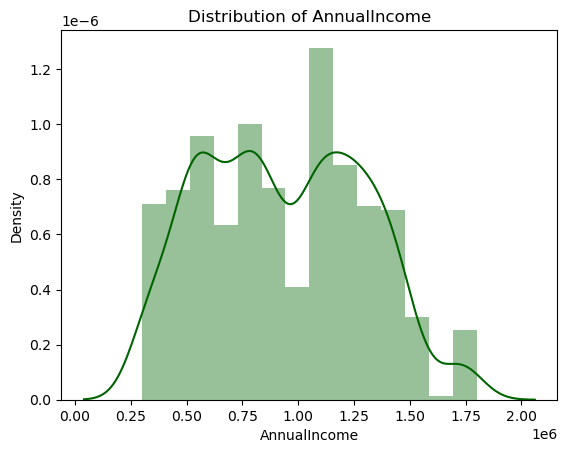

In [22]:
sns.distplot(df["AnnualIncome"],kde=True,color="darkgreen")
plt.title("Distribution of AnnualIncome")
print('Mean of AnnualIncome is : ',df["AnnualIncome"].mean().round(0))
print('Mode of AnnualIncome is : ',df["AnnualIncome"].mode()[0])
print('Median of AnnualIncome is : ',df["AnnualIncome"].median())
print('Maximum value of AnnualIncome is : ',df["AnnualIncome"].max())
print('Minimum value of AnnualIncome is : ',df["AnnualIncome"].min())
plt.show

In [23]:
df["FamilyMembers"].nunique()

8

In [24]:
def numerical_visual(col):    
    fig=df[col].value_counts().plot(kind="bar",color="purple")
    for f in fig.patches:
        text=f"{(f.get_height()/len(df)*100).round(2)}%"
        fig.annotate(text,(f.get_x()+f.get_width()/2,f.get_height()),ha="center",va="center")
    plt.xlabel(col)
    plt.show()

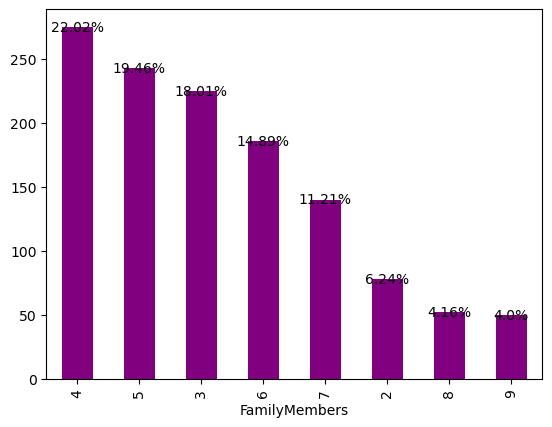

In [25]:
numerical_visual("FamilyMembers")

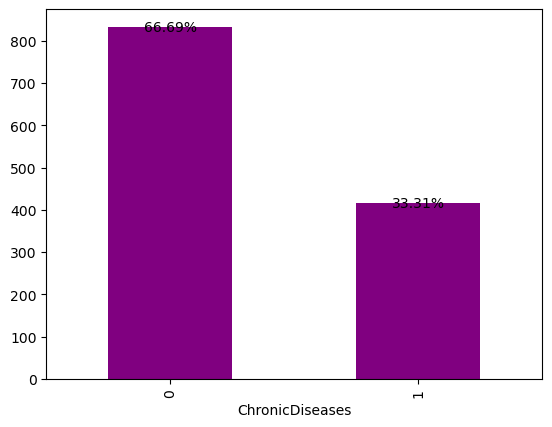

In [26]:
numerical_visual("ChronicDiseases")

In [27]:
#Exploratory Data Analysis

In [28]:
#Numerical Categorical with target variable

In [29]:
df_cat=df.select_dtypes(include="object")
df_num=df.select_dtypes(exclude="object")

In [30]:
cat_col=df_cat.columns
num_col=df_num.columns

In [31]:
len(num_col)

5

In [32]:
df.dtypes

Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [33]:
#bivariate analysis

In [34]:
#categoricl value with target variable

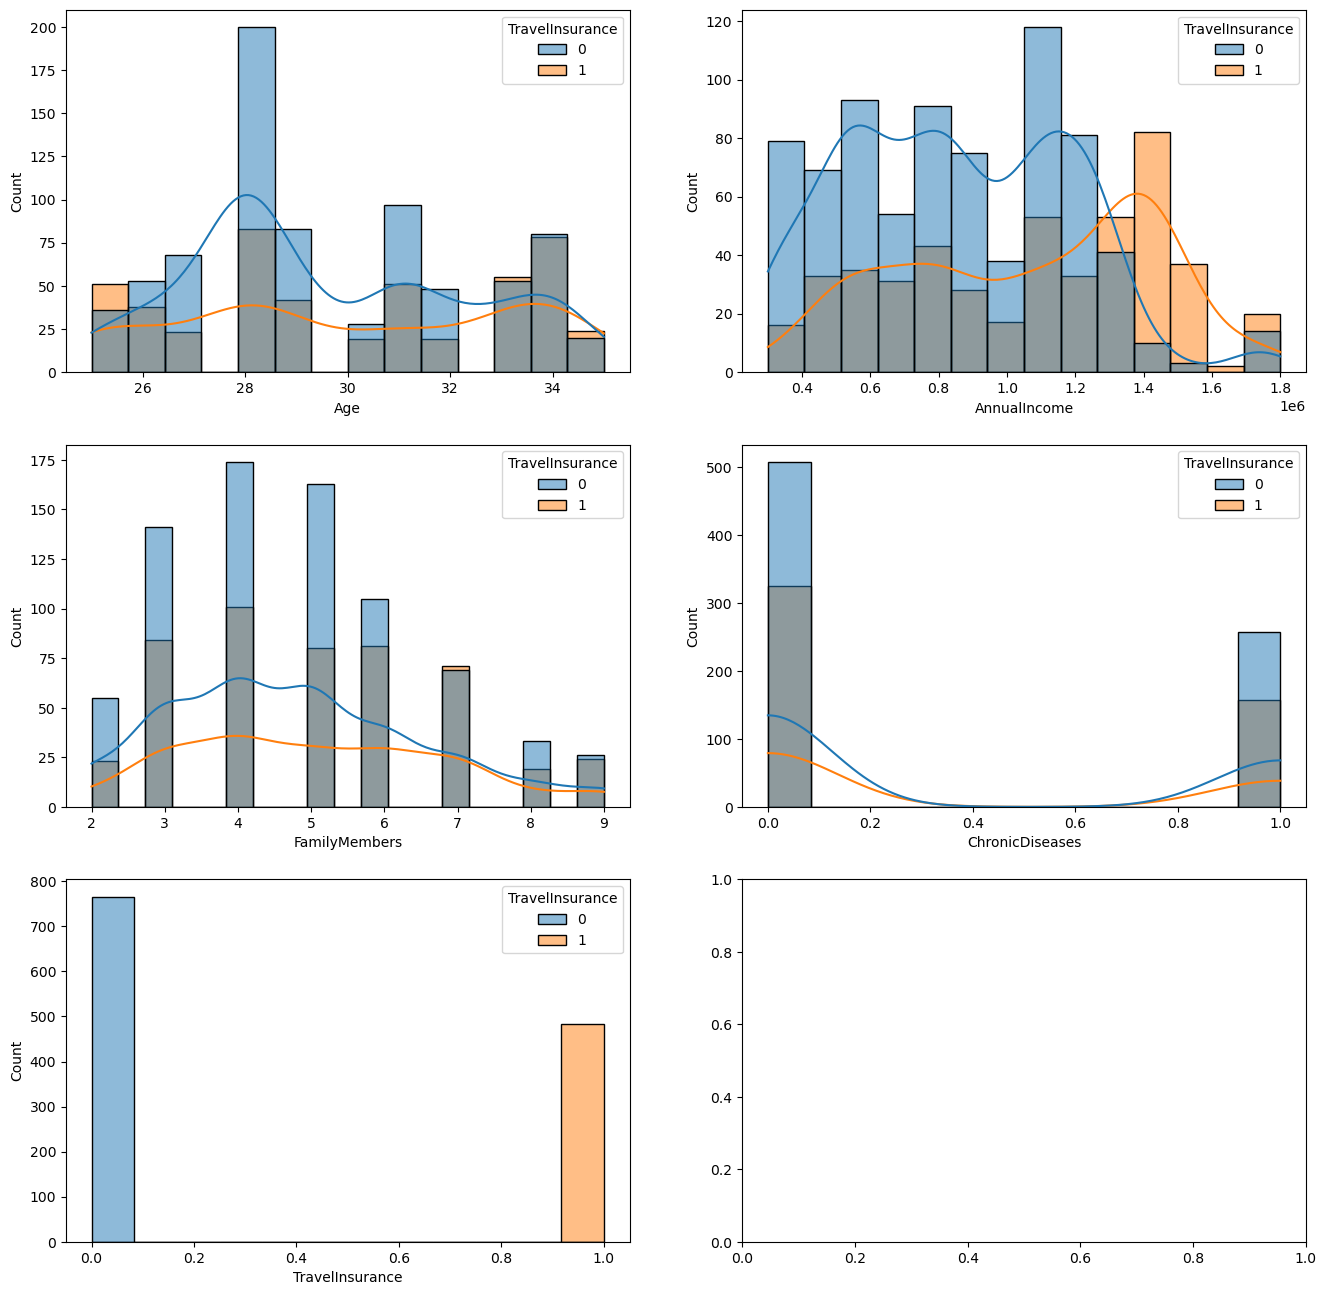

In [35]:
fig,ax=plt.subplots(3,2,figsize=(16,16))
index=0
ax=ax.flatten()
color=sns.color_palette("bright")
for col in num_col:
    sns.histplot(x=col,hue="TravelInsurance",data=df,color=color,kde=True,ax=ax[index])
    index+=1
plt.show()

In [36]:
len(cat_col)

4

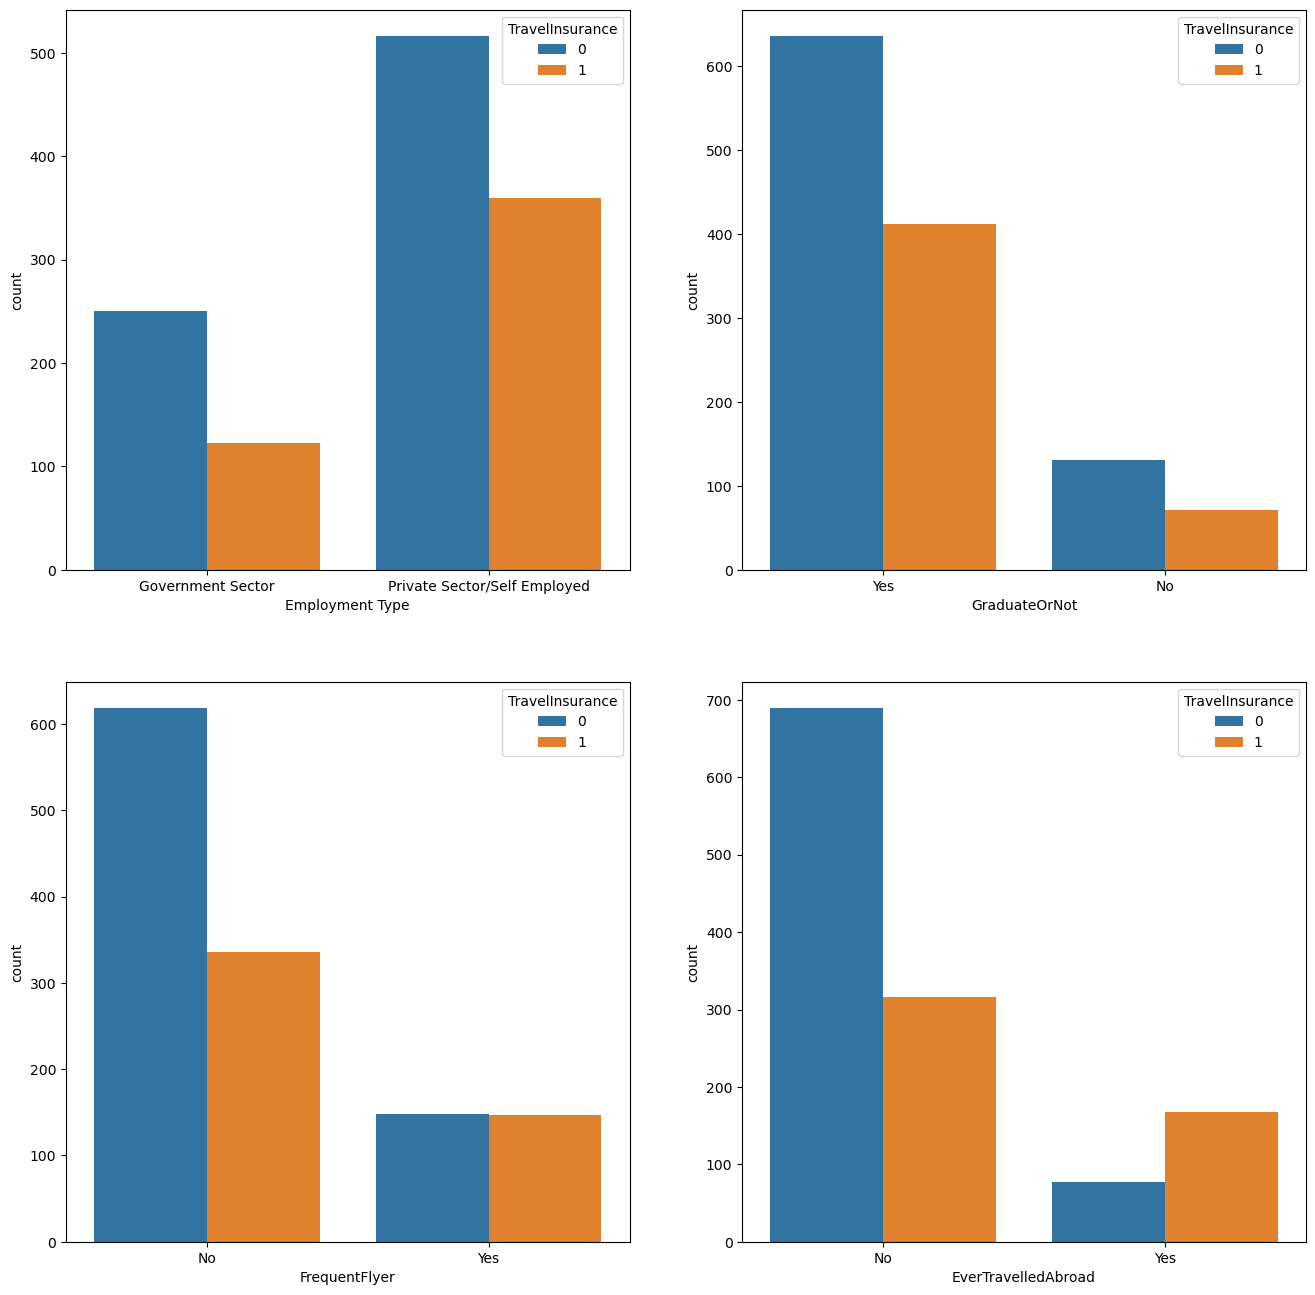

In [37]:
fig,ax=plt.subplots(2,2,figsize=(16,16))
index=0
ax=ax.flatten()
for col in df_cat.columns:
    sns.countplot(x=col,data=df,hue="TravelInsurance",ax=ax[index])
    index+=1
plt.show()

In [38]:
#numerical to categorical columns

In [39]:
columns

NameError: name 'columns' is not defined

In [ ]:
sns.barplot(data=df,y='AnnualIncome',x="FrequentFlyer",color="Pink",hue="TravelInsurance")
plt.show()

In [ ]:
columns

In [ ]:
sns.barplot(y="ChronicDiseases",x='FamilyMembers',data=df,color="darkgreen",hue="TravelInsurance")
plt.show()

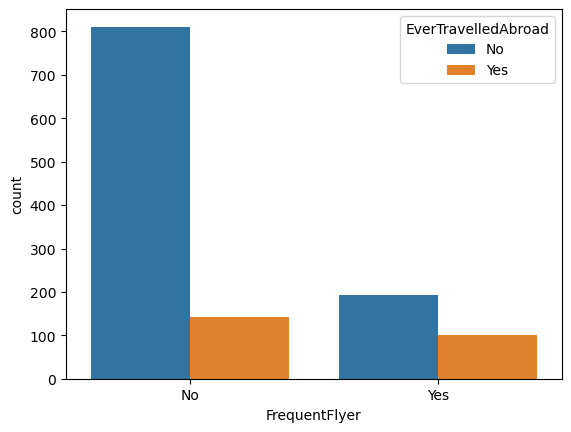

In [40]:
sns.countplot(x='FrequentFlyer',hue='EverTravelledAbroad',data=df)
plt.show()

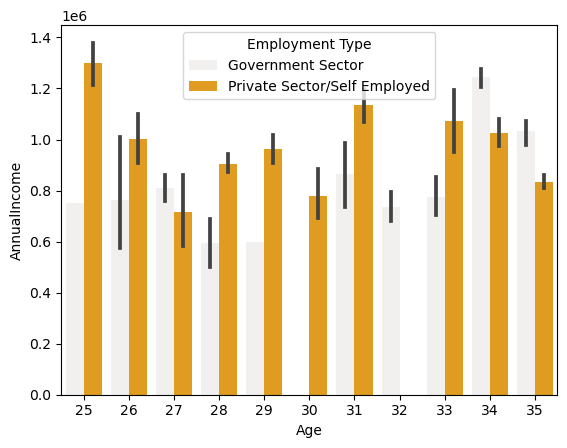

In [41]:
sns.barplot(data=df,y='AnnualIncome',x="Age",color="orange",hue="Employment Type")
plt.show()

In [42]:
#Checking corelation between variables

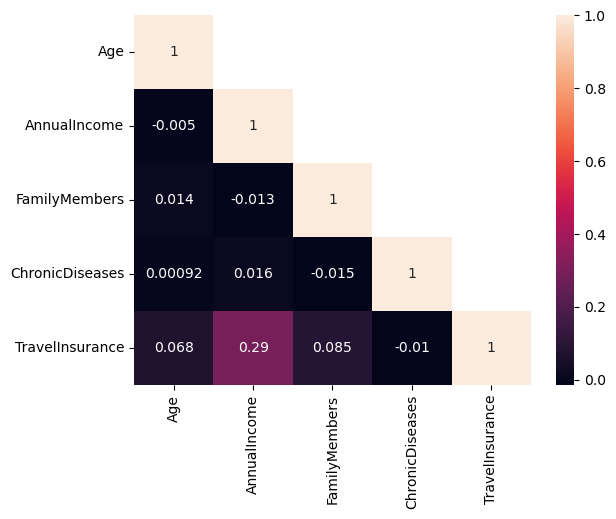

In [43]:
mask=np.triu(df.corr(),1)
sns.heatmap(df.corr(),mask=mask,color="green",annot=True)
plt.show()

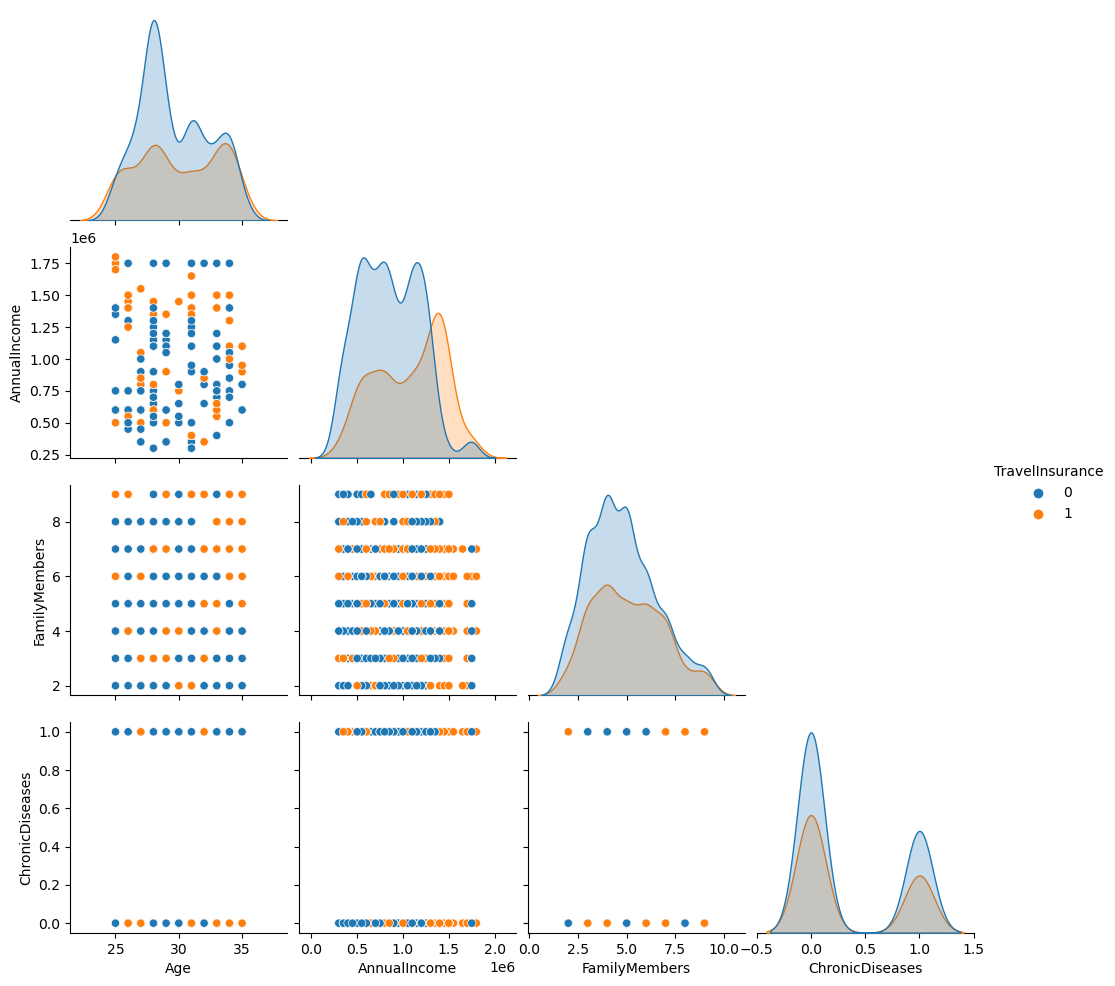

In [44]:
sns.pairplot(df,corner=True,kind="scatter",hue="TravelInsurance")
plt.show()

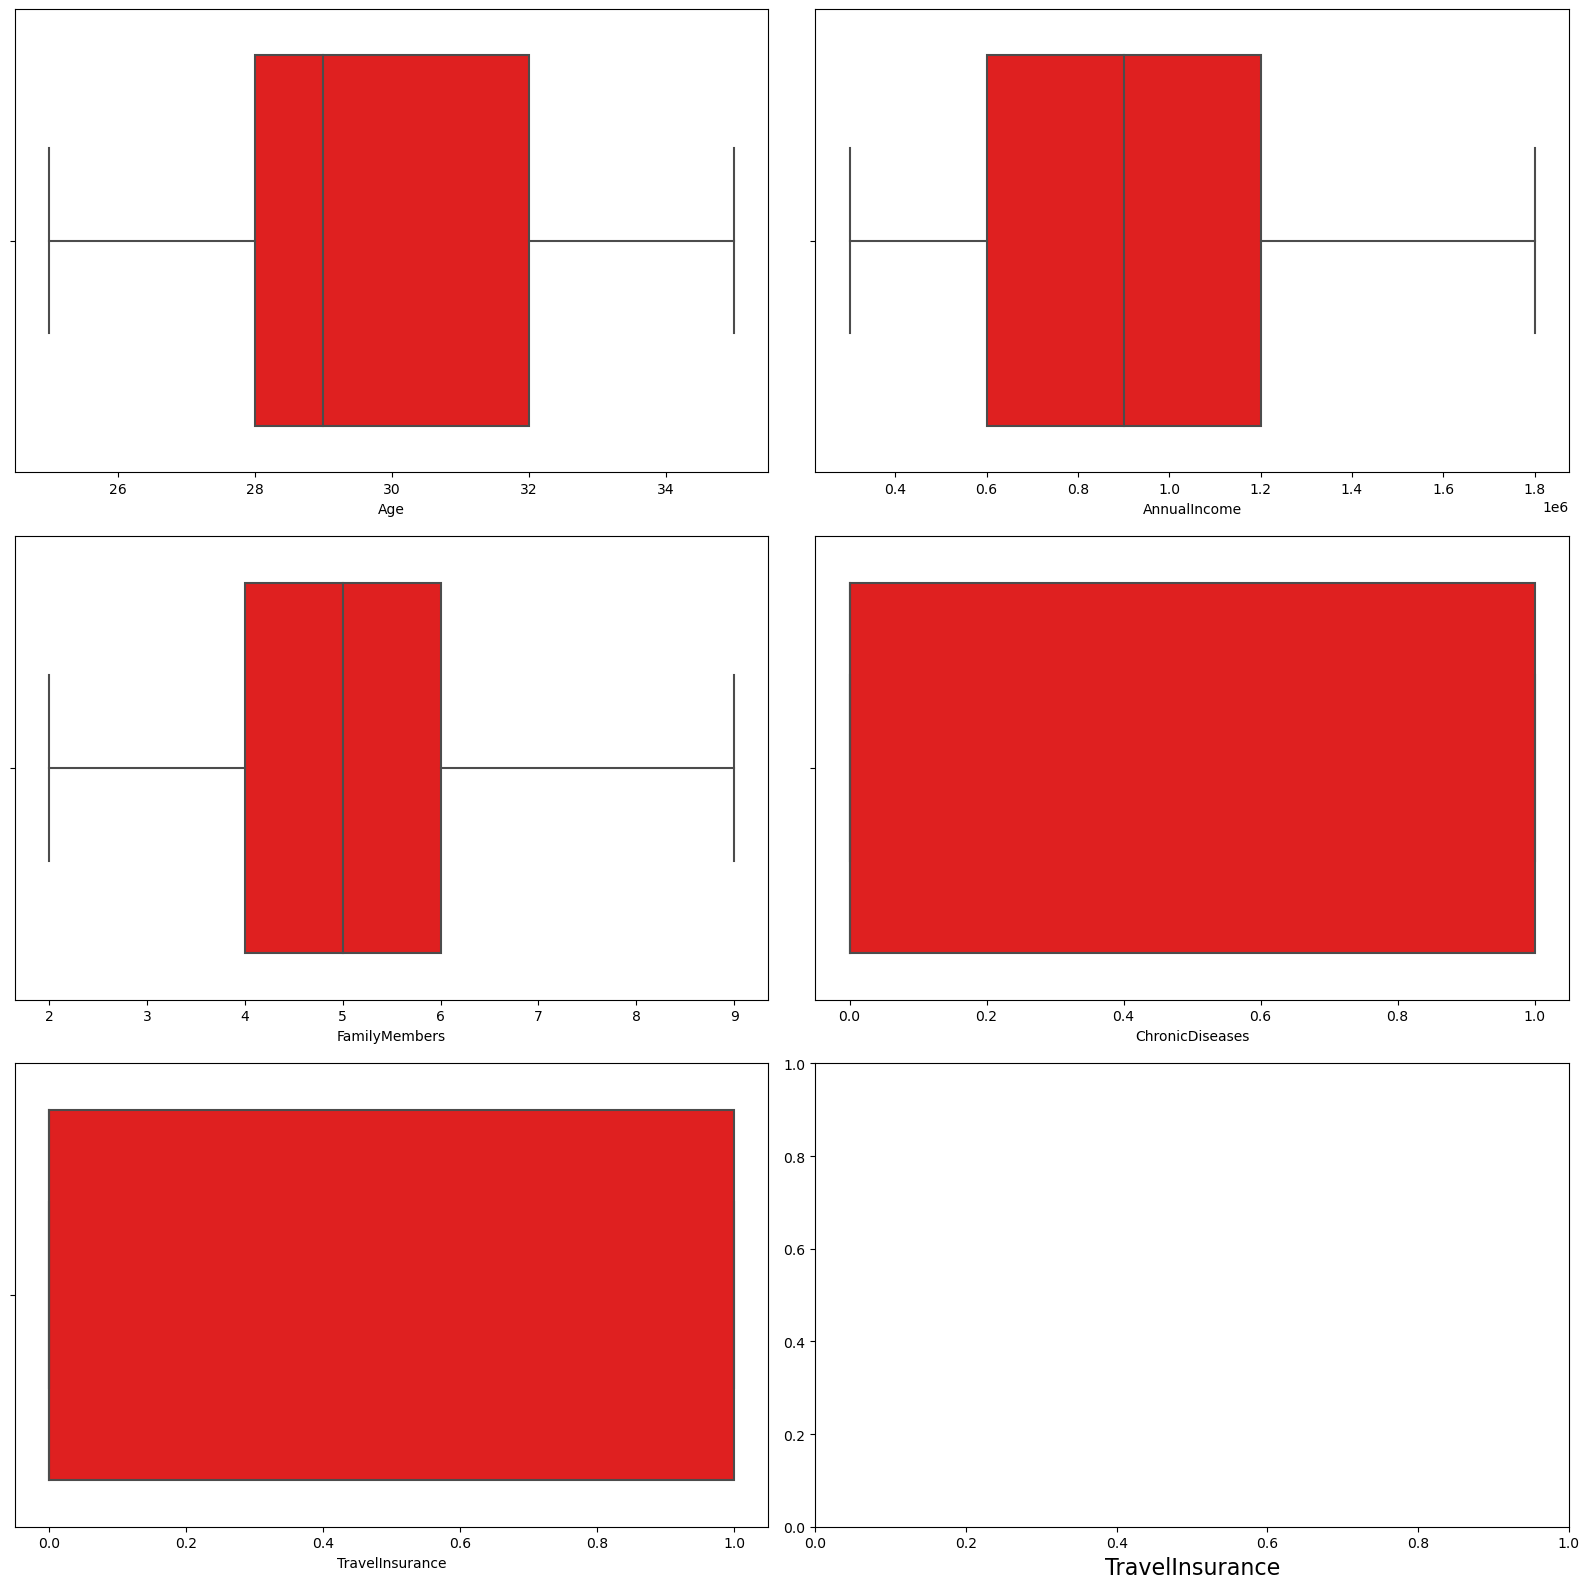

In [45]:
#checking outliers
fig,ax=plt.subplots(3,2,figsize=(16,16))
index=0
ax=ax.flatten()
for col in num_col:
    sns.boxplot(data=df,x=col,ax=ax[index],color="red")
    index+=1
    plt.tight_layout()
    plt.xlabel(col,size=16)
plt.show()
  


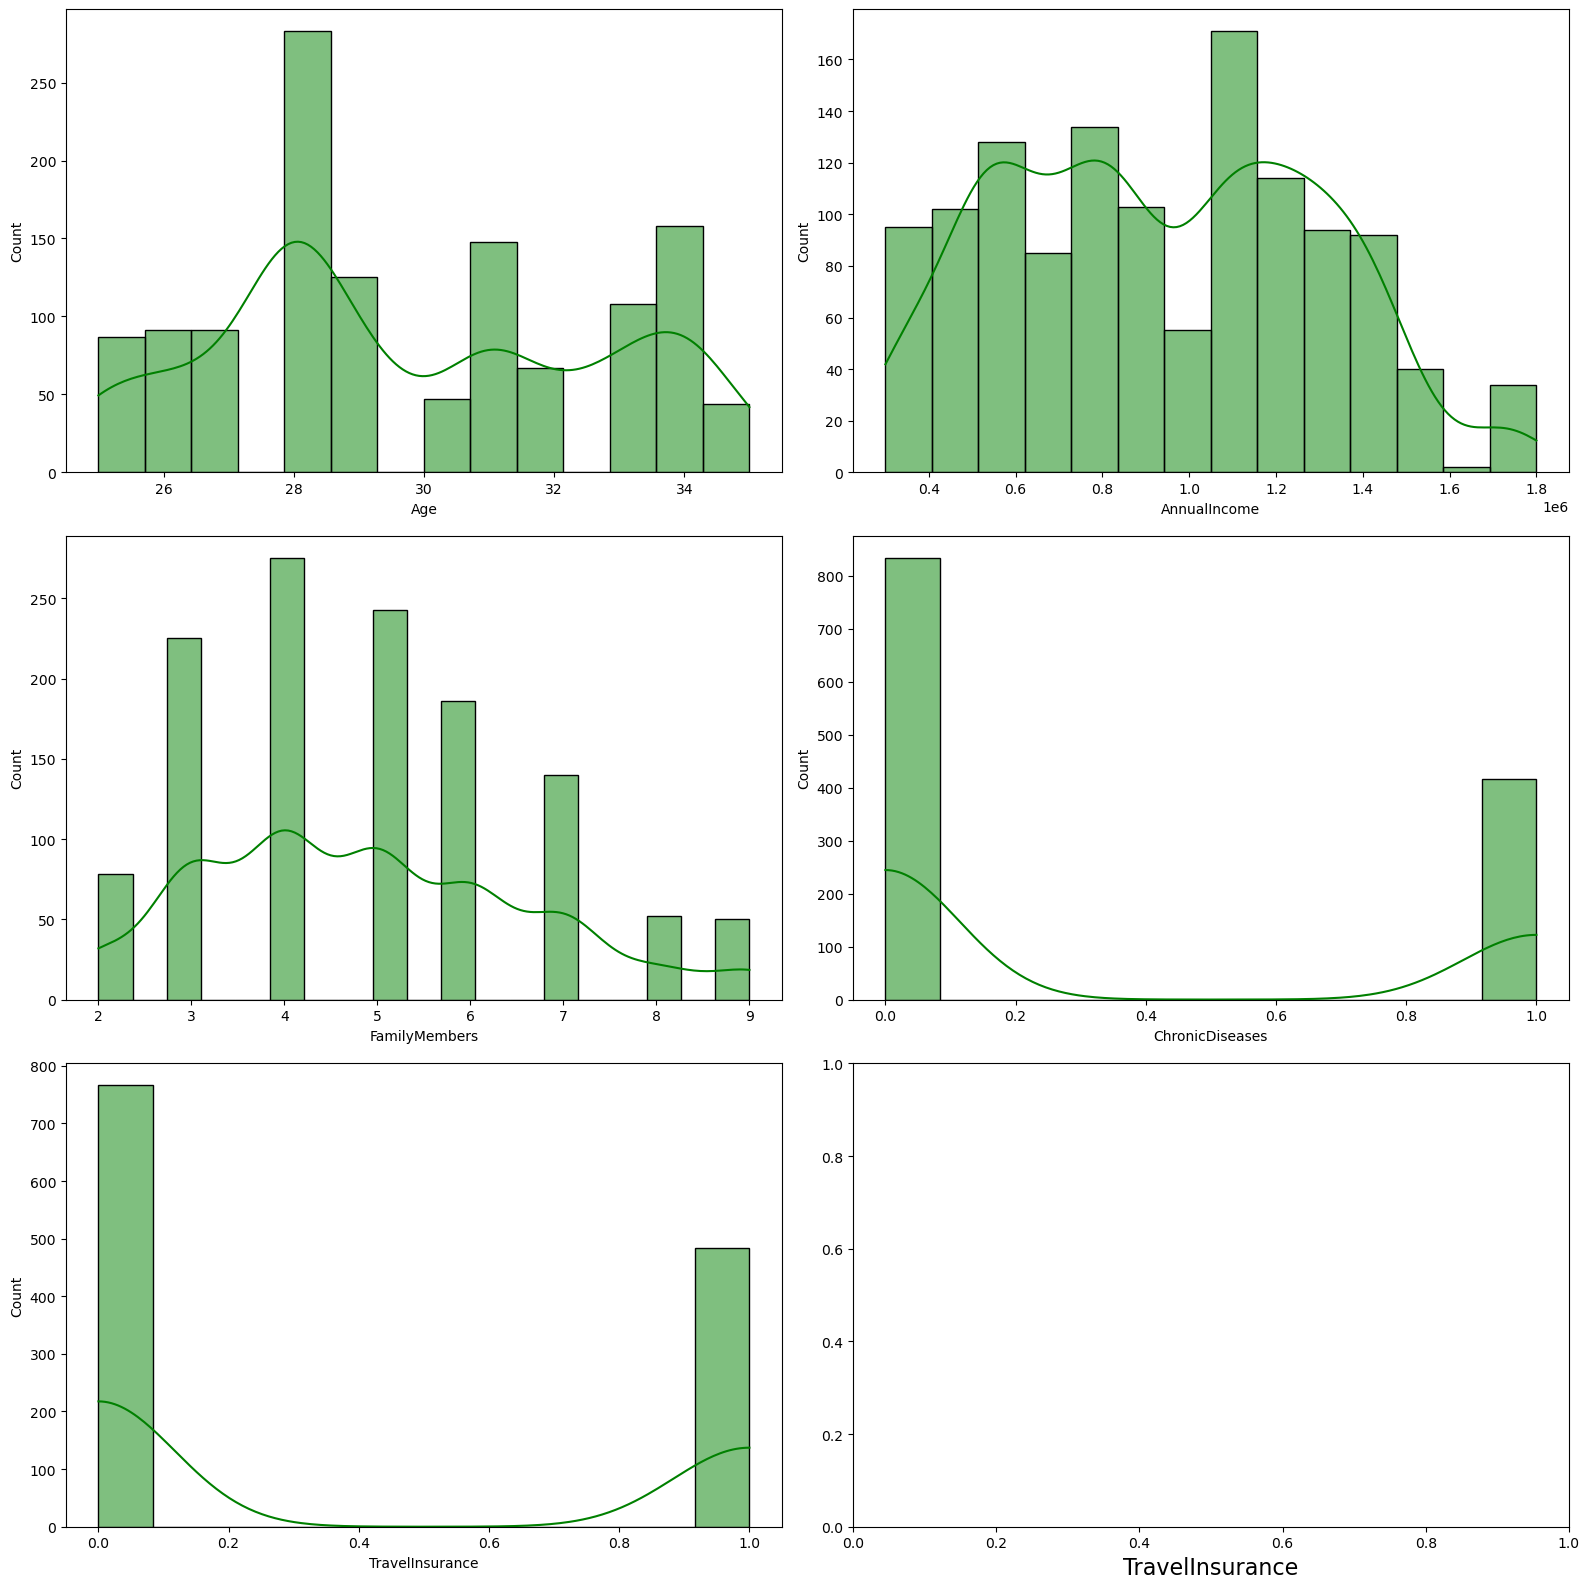

In [51]:
fig,ax=plt.subplots(3,2,figsize=(16,16))
index=0
ax=ax.flatten()
for col in num_col:
    sns.histplot(data=df,x=col,ax=ax[index],color="green",kde=True)
    index+=1
    plt.tight_layout()
    plt.xlabel(col,size=16)
plt.show()

In [ ]:
#Data PreProcessing

In [46]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [47]:
#encoding(converting categorical variable ito numerical)
cat_var=['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad']

df=pd.get_dummies(data=df,columns=cat_var)




In [48]:
df

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
0,31,400000,6,1,0,1,0,0,1,1,0,1,0
1,31,1250000,7,0,0,0,1,0,1,1,0,1,0
2,34,500000,4,1,1,0,1,0,1,1,0,1,0
3,28,700000,3,1,0,0,1,0,1,1,0,1,0
4,28,700000,8,1,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,32,900000,6,0,0,1,0,0,1,1,0,1,0
1981,27,850000,3,0,1,1,0,0,1,1,0,1,0
1982,33,1500000,4,0,1,0,1,0,1,0,1,0,1
1983,28,1750000,5,1,0,0,1,0,1,1,0,0,1


In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [223]:
lr=LogisticRegression(random_state=42)
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
kn=KNeighborsClassifier()

In [148]:
#splitting dataset

In [79]:
from sklearn.model_selection import train_test_split

In [205]:
#creating X and Y
y=df["TravelInsurance"]
x=df.drop("TravelInsurance",axis=1)


In [206]:
#split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [207]:
#performing Scaling
scaler=StandardScaler()

In [208]:
x_train_scaler=scaler.fit_transform(x_train)

In [209]:
x_test_scaler=scaler.transform(x_test)

In [210]:
from sklearn.metrics import precision_score

In [224]:
model=[lr,dt,rf,kn]
for model in model:
    model.fit(x_train_scaler,y_train)
    y_pred=model.predict(x_test_scaler)
    score=precision_score(y_test,y_pred)
    print(f"Precision score of {model} : ",score)


Precision score of LogisticRegression(random_state=42) :  0.72
Precision score of DecisionTreeClassifier() :  0.550561797752809
Precision score of RandomForestClassifier() :  0.5227272727272727
Precision score of KNeighborsClassifier() :  0.6710526315789473


In [214]:
lr.coef_[0]

array([ 0.22028642,  0.43958376,  0.20801181, -0.02168623, -0.0188244 ,
        0.0188244 ,  0.01209946, -0.01209946, -0.03947491,  0.03947491,
       -0.23340637,  0.23340637])

In [215]:
lr.intercept_[0]

-0.5249322297890202

In [216]:
pip install shap

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

                                              0.0/450.3 kB ? eta -:--:--
     ---                                     41.0/450.3 kB 2.0 MB/s eta 0:00:01
     -------                                 92.2/450.3 kB 1.3 MB/s eta 0:00:01
     -------------                          163.8/450.3 kB 1.7 MB/s eta 0:00:01
     --------------------                   245.8/450.3 kB 1.4 MB/s eta 0:00:01
     -------------------------              297.0/450.3 kB 1.4 MB/s eta 0:00:01
     -------------------------------        378.9/450.3 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 450.3/450.3 kB 1.3 MB/s eta 0:00:00


In [217]:
import shap

In [179]:
#hyperparameter tuning

In [180]:
from sklearn.model_selection import GridSearchCV

In [199]:

param_grid={
    'penalty':['l1','l2'],
    'C':[0.1,1,5,10],
    'solver':['liblinear','saga'],
    'class_weight':[None,'balanced']
}

logreg=LogisticRegression()
scoring=["precision","accuracy","recall"]

grid_search=GridSearchCV(logreg,param_grid,cv=10,scoring='precision')
grid_search.fit(x_train_scaler,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 5, 10],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='precision')

In [200]:
#Best hyperparameter and corresponding accuracy
# print("Best hyperparameter ",grid_search.best_params_)
print("Best cross-validation accuracy ",grid_search.best_score_)

Best cross-validation accuracy  0.7021178168236991


In [201]:
grid_search.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

In [203]:
knn_param_grid={'n_neighbors':[3,5,7],
                'weights':['uniform','distance'],
                'algorithm':['auto','ball_tree','kde_tree','brute']
               
               }
knn_grid_search=GridSearchCV(kn,knn_param_grid,cv=5,scoring='precision')
knn_grid_search.fit(x_train_scaler,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kde_tree',
                                       'brute'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='precision')

In [204]:
print("Best cross-validation accuracy ",knn_grid_search.best_score_)

Best cross-validation accuracy  0.5918650793650794


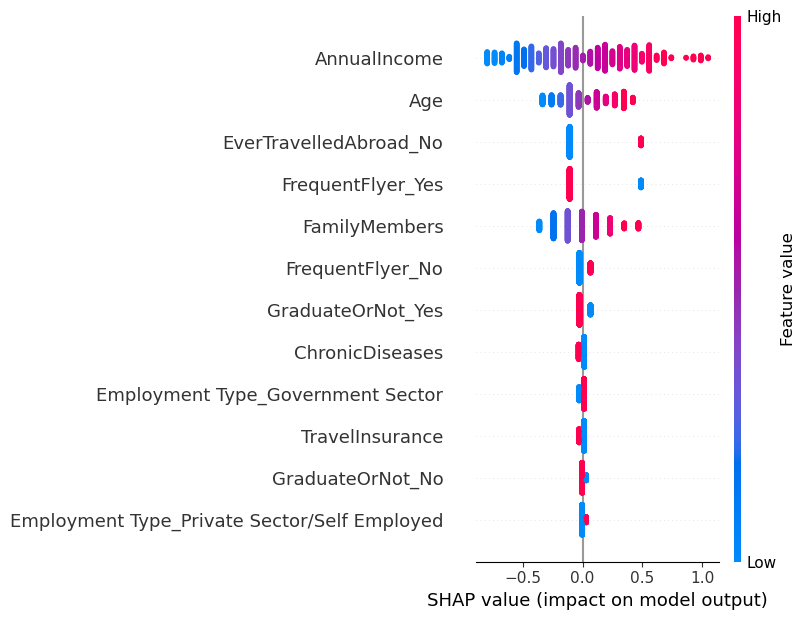

In [222]:
#creating shap explainer object
lr_explainer=shap.Explainer(lr,x_train_scaler)
#calculate Shap value
shap_value=lr_explainer(x_train_scaler)
#plot Summery plot
shap.summary_plot(shap_value,x_train_scaler,feature_names=df.columns,show=False)